<a href="https://colab.research.google.com/github/JeandsGomes/Estudando_Ciencia_de_Dados_com_Python/blob/main/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

notas = pd.read_csv("/content/drive/MyDrive/1.Projetos GitHub/Data Science/ratings.csv")

In [ ]:
# Mostar os 5 primeiros elementos
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# Informar as dimenções das tabelas
notas.shape

(100836, 4)

In [ ]:
# Redefinir os nomes das colunas
notas.columns = ["usuarioId","filmeId","nota","momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analizando as notas em geral

In [ ]:
# Observar todos os valores da coluna nota
notas['nota'] # Uma serie

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [ ]:
# Quais são os valores unicos dessa dessa tabela
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
# Frequencia das notas na tabela
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
# Media de todas as notas e mediana
print('Media:',notas['nota'].mean())
print('Mediana:',notas.nota.median())

Media: 3.501556983616962
Mediana: 3.5


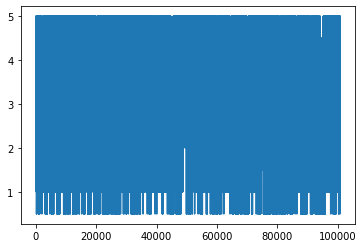

In [ ]:
# Como plotar uma coluna com pandas
notas.nota.plot()
# Por padrão ele var um plote de linhas com dimenções index X valor

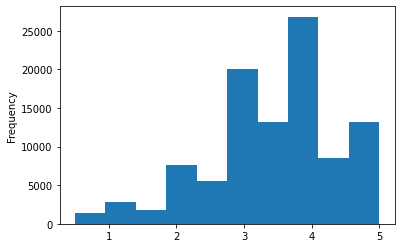

In [ ]:
# Como plotar em forma de histograma com pandas
notas.nota.plot(kind='hist')

In [ ]:
# Visalizar varias informação
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


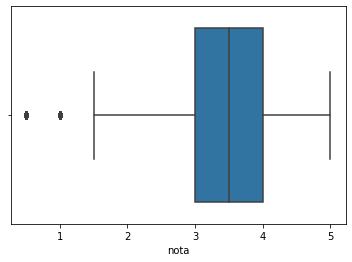

In [ ]:
# Plotagemd o tipo blox plot
import seaborn as sns
sns.boxplot(notas.nota) 

Cada caixa representar 25% ou seja as duas compõem 50 porcendo, a linha cenmtral representa a mediana. as linhas apos as caixas tambem correspondem a 25% cada.
* O que podemos concluir a respieto disso ??

  * Mertade das pessoas (50%) esta dando notas entre 3 e 4.
  * menos de 25% das pessoas deram notas entre 1.5 e 3.
  * 25% das pessaos deram notas entre 4 e 5.



## Exploratory data analysis

## Olhando os filmes

In [ ]:
filmes = pd.read_csv('/content/drive/MyDrive/1.Projetos GitHub/Data Science/movies.csv')

In [ ]:
filmes.columns = ['filmeId','titulo','generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analizando alguimas notas especificas

### Toy Story

In [ ]:
# Quealizar uma query
notas.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [ ]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

### Jumanjy

In [ ]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

### Agrupar as notas por meio dos filmes

In [ ]:
notas.groupby("filmeId")

### Obtear as medias de notas de cada filme

In [ ]:
medias_por_filmes = notas.groupby("filmeId").nota.mean()
medias_por_filmes

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [ ]:
medias_por_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

### Plotando o histograma media dos filmes

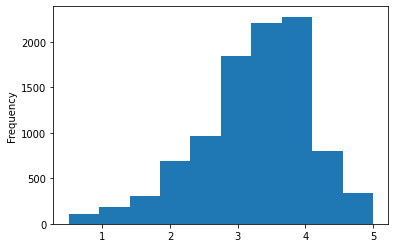

In [ ]:
medias_por_filmes.plot(kind="hist")

### Ponto usando boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


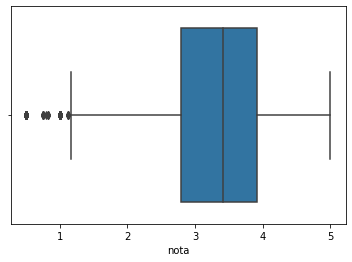

In [ ]:
sns.boxplot(medias_por_filmes)

In [ ]:
medias_por_filmes.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

* Quais são as conclusoes que obtivemos ??
  * A mediana das notas de 3.41
  * 25% das notas estar entre 3.4 e 2.8
  * 25% apos os 75% as notas stão entre 3.9 e 5.0



### Distribuição dos valores das notas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


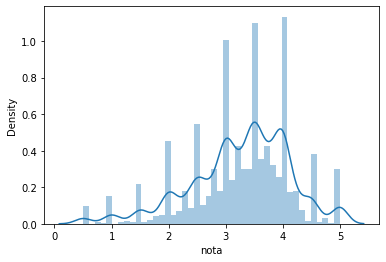

In [ ]:
sns.distplot(medias_por_filmes)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


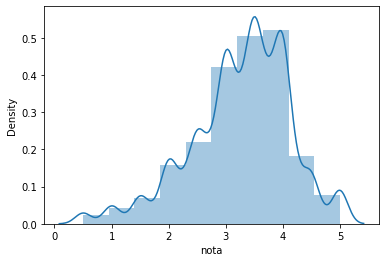

In [ ]:
# Modificando as distribuições do distplot
sns.distplot(medias_por_filmes, bins=10)
# OBS.: CUidado com a quantidade de distribuição que você vai 
# usar, pois é possivel passar a informação errada a respeito
# dos dados mostrados.

Text(0.5, 1.0, 'Histograma das medias dos filmes')

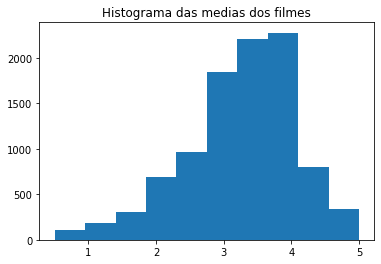

In [ ]:
# Biblioteca que o pandas e o seaborn para plotar
import matplotlib.pyplot as plt

plt.hist(medias_por_filmes)
plt.title("Histograma das medias dos filmes")

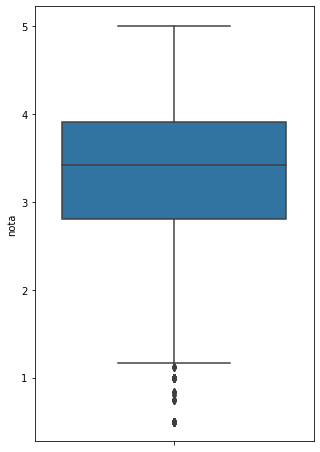

In [ ]:
# Uma ontra forma de plotar com o sns.boxplot
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filmes)

## Analise da base de dados TMDB 5000

In [ ]:
import pandas as pd 
tmdb = pd.read_csv('/content/drive/MyDrive/1.Projetos GitHub/Data Science/tmdb_5000/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# Variavel do tipo categorica nominal é a que possui varias categorias e 
# nem um valor quantitativo.
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
# Variavel do tipo categorica ordinal onde possui varias 
# categorias hieraquicamente separadas.
# primeiro > segundo > terceiro

In [ ]:
# Variavel do tipo qunatitativo não intervalar e continuo.
tmdb.budget.unique()

array([237000000, 300000000, 245000000, 250000000, 260000000, 258000000,
       280000000, 270000000, 200000000, 255000000, 225000000, 220000000,
       380000000, 215000000, 180000000, 207000000, 209000000, 150000000,
       210000000, 170000000, 190000000, 195000000, 105000000, 185000000,
       175000000, 140000000, 176000003, 178000000, 145000000,  27000000,
       165000000, 160000000,  15000000,  38000000, 155000000, 149000000,
       144000000,  70000000, 100000000, 139000000, 135000000, 130000000,
       137000000, 120000000, 132000000, 110000000, 125000000, 127500000,
       127000000, 103000000,  65000000, 123000000, 115000000, 117000000,
       113000000,  97250400, 116000000, 112000000,  93000000, 107000000,
               0, 133000000, 108000000, 126000000,  90000000, 102000000,
        80000000,  84000000,  99000000,  10000000,  98000000,  94000000,
        85000000,  92000000,  95000000,  79000000,  75000000,  88000000,
        68000000,  20000000,  87000000,  60000000, 

In [ ]:
# Variavel do tipo qunatitativo supostamente intervalar não 
# continuo.
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [ ]:
# Ocorrencia das linguagens
tmdb['original_language'].value_counts() # É apenas uma Serie

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
cs       2
ta       2
ro       2
id       2
ar       2
no       1
vi       1
nb       1
is       1
ky       1
xx       1
pl       1
el       1
sl       1
hu       1
ps       1
tr       1
te       1
af       1
Name: original_language, dtype: int64

In [ ]:
# Transformando uma serie em um frame com index
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language','total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


## Visualização de catecogira

[Categorical Plots](https://seaborn.pydata.org/tutorial/categorical.html)

In [ ]:
import seaborn as sns

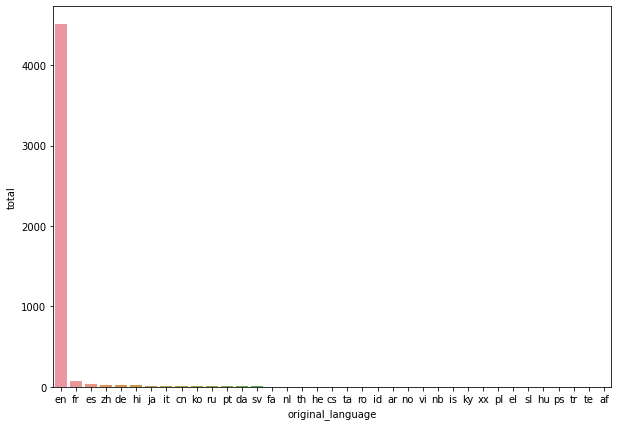

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'original_language', y = 'total',data = contagem_de_lingua)

In [ ]:
# Atualizando para usar a verção mais atual se nescesario atual
print(sns.__version__)
#pip install <nome da biblioteca>==<verção que deseja>
# Resete o notebook

0.11.2


In [ ]:
import matplotlib.pyplot as plt 

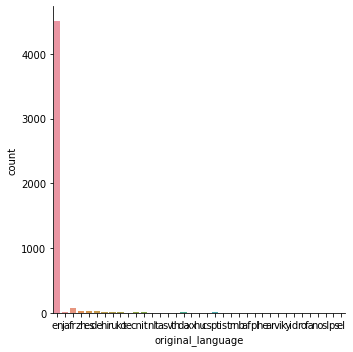

In [ ]:
# Plotar os dados usando a base original
#legend_outbool
sns.catplot(x = 'original_language', kind='count',data=tmdb, legend_out= True)

([<matplotlib.patches.Wedge at 0x7f202eb62210>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

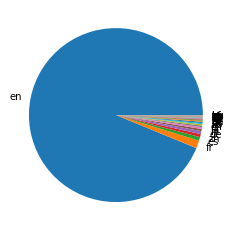

In [ ]:
plt.pie(contagem_de_lingua['total'], labels=contagem_de_lingua['original_language'])

Como a categoria 'en' é muito grante não é possivel visalizar da aplitude dessa categoria em relação das outras classes (OBS.: o grafico de pizza é so ruim mesmo). Então por essa razão nos vamos apenas compra a categoria "en" em relação ao restante da linguas.

In [ ]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print('en =',total_de_ingles)
print('resto =',total_do_resto)

en = 4505
resto = 298


In [ ]:
# Criar um data frame
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles,total_do_resto]
}
dados = pd.DataFrame(dados)

In [ ]:
dados

,lingua,total
0,ingles,4505
1,outros,298


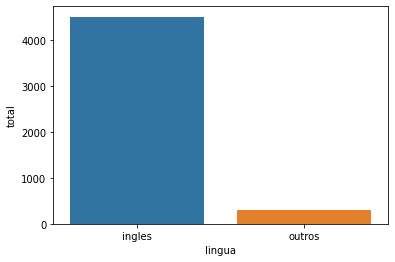

In [ ]:
sns.barplot(x='lingua',y='total',data = dados)